<a href="https://colab.research.google.com/github/Satya-1729/Python_machine_learning/blob/main/Train_a_Deep_learning_model_to_classify_a_given_image_using_pre_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Set your target size
target_size = (224, 224)

# Define paths for your folders
cat_folder = '/content/drive/MyDrive/train/cats'
dog_folder = '/content/drive/MyDrive/train/dogs'

X_train = []
y_train = []

# Process cat images (label = 0)
for img_name in os.listdir(cat_folder):
    img_path = os.path.join(cat_folder, img_name)
    if img_name.endswith('.jpg') or img_name.endswith('.png'):
        img = Image.open(img_path)
        img_resized = img.resize(target_size)  # Ensure resizing
        img_rgb = img_resized.convert('RGB')  # Convert to RGB (important)
        img_array = np.array(img_rgb)         # Convert to numpy array
        X_train.append(img_array)
        y_train.append(0)  # Label 0 for cats

# Process dog images (label = 1)
for img_name in os.listdir(dog_folder):
    img_path = os.path.join(dog_folder, img_name)
    if img_name.endswith('.jpg') or img_name.endswith('.png'):
        img = Image.open(img_path)
        img_resized = img.resize(target_size)  # Ensure resizing
        img_rgb = img_resized.convert('RGB')  # Convert to RGB (important)
        img_array = np.array(img_rgb)         # Convert to numpy array
        X_train.append(img_array)
        y_train.append(1)  # Label 1 for dogs

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Ensure that images have the correct shape
print(f"Shape of X_train: {X_train.shape}")  # It should be (num_images, 224, 224, 3)
print(f"Shape of y_train: {y_train.shape}")  # It should be (num_images,)

# Normalize the images to [0, 1]
X_train = X_train / 255.0




# Now X_train and y_train are ready to be used in training a model
print(X_train.shape, y_train.shape)  # Check the shapes of your data

from sklearn.model_selection import train_test_split

# First, split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Then, split train into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")




Shape of X_train: (557, 224, 224, 3)
Shape of y_train: (557,)
(557, 224, 224, 3) (557,)
Train shape: (356, 224, 224, 3), (356,)
Validation shape: (89, 224, 224, 3), (89,)
Test shape: (112, 224, 224, 3), (112,)


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

# Load the pre-trained ResNet50 model (excluding the top fully connected layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain its pre-trained weights
base_model.trainable = False

# Build a new model on top of the pre-trained ResNet50
model = models.Sequential([
    base_model,  # Add ResNet50 base model
    layers.GlobalAveragePooling2D(),  # Add a global average pooling layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification (cat or dog)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [7]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.5262 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - accuracy: 0.4752 - loss: 0.6976 - val_accuracy: 0.4722 - val_loss: 0.7119
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 68s 8s/step - accuracy: 0.5226 - loss: 0.6934 - val_accuracy: 0.6528 - val_loss: 0.6875
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.5662 - loss: 0.6861 - val_accuracy: 0.5833 - val_loss: 0.6859
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 90s 9s/step - accuracy: 0.5313 - loss: 0.6784 - val_accuracy: 0.5556 - val_loss: 0.6848
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.5149 - loss: 0.6779 - val_accuracy: 0.5972 - val_loss: 0.6815
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.5326 - loss: 0.6770 - val_accuracy: 0.5694 - val_loss: 0.6833
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 69s 8s/step - accuracy: 0.5887 - loss: 0.6676 - val_accuracy: 0.6389 - val_loss: 0.6765
Epoch 9/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Predicted Label: Dog


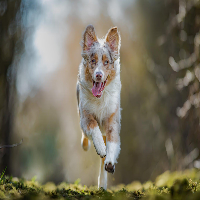

In [26]:
from PIL import Image
import numpy as np

# Path to a new image
img_path = "/content/drive/MyDrive/train/dogs/dog_0.jpg"

# Load a new image and preprocess it
def preprocess_image(img_path, target_size=(224, 224)):
    img = Image.open(img_path)
    img = img.resize(target_size)  # Resize to match model input
    img = img.convert('RGB')       # Ensure RGB format
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array


# Preprocess and predict
new_image = preprocess_image(img_path)
prediction = model.predict(new_image)

# Interpret result (assuming binary classification: 0 = Cat, 1 = Dog)
label = "Dog" if prediction[0][0] > 0.5 else "Cat"
print(f"Predicted Label: {label}")

import cv2
from google.colab.patches import cv2_imshow  # Use cv2_imshow for Colab

# Load the image (read file as NumPy array)

img = cv2.imread(img_path)

# Check if the image is loaded correctly
if img is None:
    print("Error: Image not loaded. Check the file path!")
else:
    # Resize the image to (200, 300)
    resized_img = cv2.resize(img, (200, 200))

    # Display the resized image in Colab
    cv2_imshow(resized_img)

    # Save the resized image (optional)
    cv2.imwrite("resized_image.jpg", resized_img)

